question: Which Early-Game Features Most Predict Winning?
Goal: Identify which early-game (10-minute) features most strongly influence match outcome (blueWins) in high-ELO ranked games.
Why it matters: actionable priorities for players/analysts (objective control, economy, vision) and interpretable benchmarks for esports analytics.

Source: https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

target:BlueWins

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from statsmodels.stats.outliers_influence import variance_inflation_factor




In [2]:
DATA_PATH = "high_diamond_ranked_10min.csv"
unprocess_data = pd.read_csv(DATA_PATH)


In [3]:
blue_win_rate = unprocess_data['blueWins'].mean()  # Proportion of blue wins
blue_win_rate


np.float64(0.4990383642069035)

In [4]:
unprocess_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
unprocess_data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [6]:
unprocess_data.isna().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [7]:
data = unprocess_data

here we symetric different value diffX = BlueX - RedX

In [8]:
target = "blueWins"

base_cols = [c for c in data.columns if c not in ['blueWins', 'redWins']]

#blue - red
diff_features = {}
for col in base_cols:
    if col.startswith("blue"):
        red_col = col.replace("blue", "red")
        if red_col in data.columns:
            diff_features[col.replace("blue", "diff")] = data[col] - data[red_col]

df_diff = pd.DataFrame(diff_features)
df_final = pd.concat([df_diff, data[target]], axis=1)

print(df_final.shape)
df_final.head()


(9879, 20)


,diffWardsPlaced,diffWardsDestroyed,diffFirstBlood,diffKills,diffDeaths,diffAssists,diffEliteMonsters,diffDragons,diffHeralds,diffTowersDestroyed,diffTotalGold,diffAvgLevel,diffTotalExperience,diffTotalMinionsKilled,diffTotalJungleMinionsKilled,diffGoldDiff,diffExperienceDiff,diffCSPerMin,diffGoldPerMin,blueWins
0,13,-4,1,3,-3,3,0,0,0,0,643,-0.2,-8,-2,-19,1286,-16,-0.2,64.3,0
1,0,0,-1,0,0,3,-2,-1,-1,-1,-2908,-0.2,-1173,-66,-9,-5816,-2346,-6.6,-290.8,0
2,0,-3,-1,-4,4,-10,1,1,0,0,-1172,-0.4,-1033,-17,18,-2344,-2066,-1.7,-117.2,0
3,28,-1,-1,-1,1,-5,1,0,1,0,-1321,0.0,-7,-34,8,-2642,-14,-3.4,-132.1,0
4,58,2,-1,0,0,-1,-1,-1,0,0,-1004,0.0,230,-15,-10,-2008,460,-1.5,-100.4,0


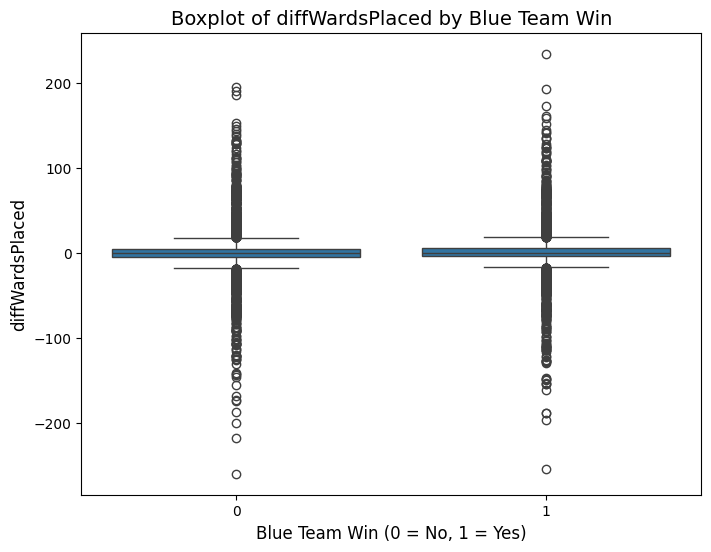

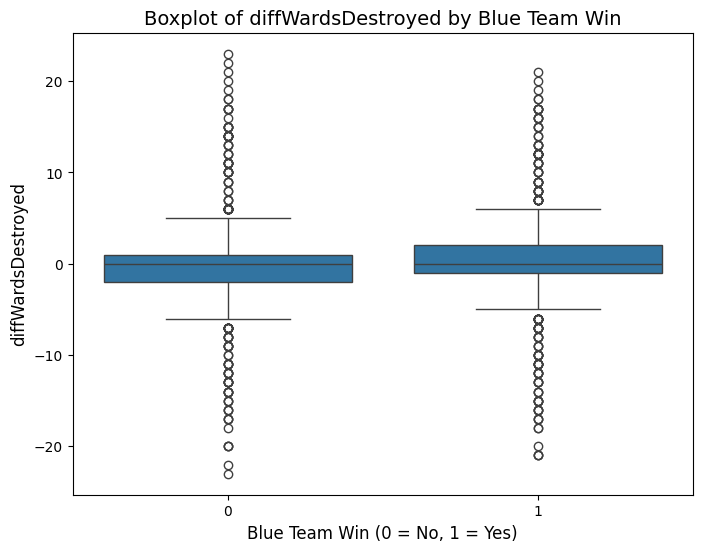

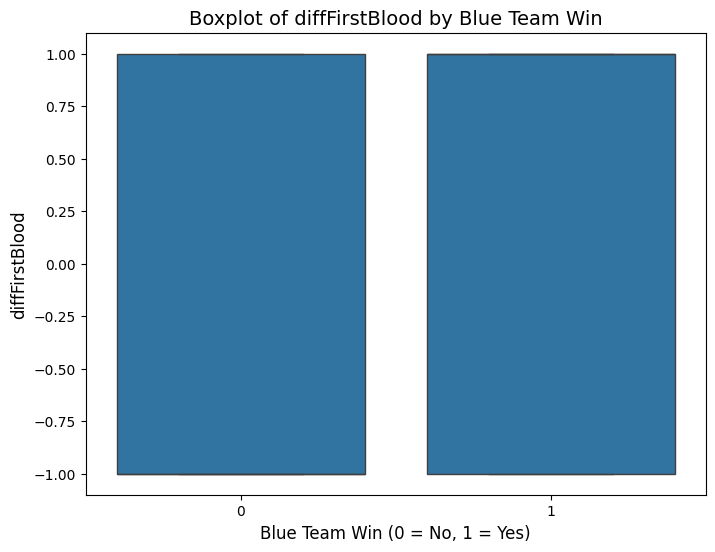

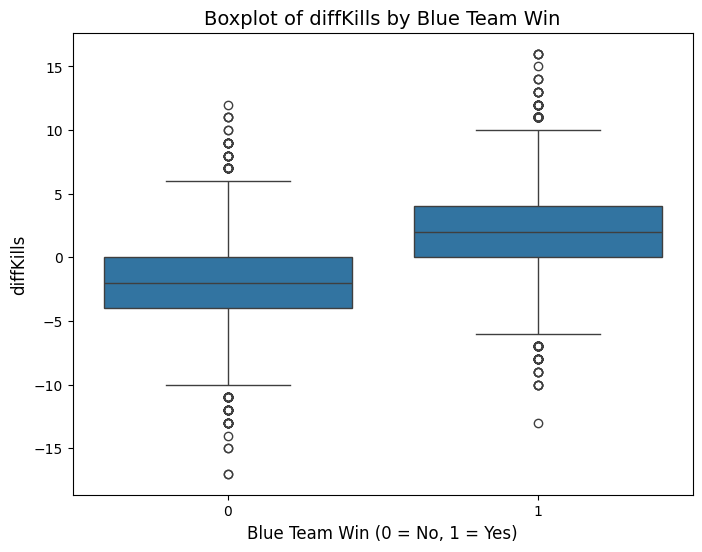

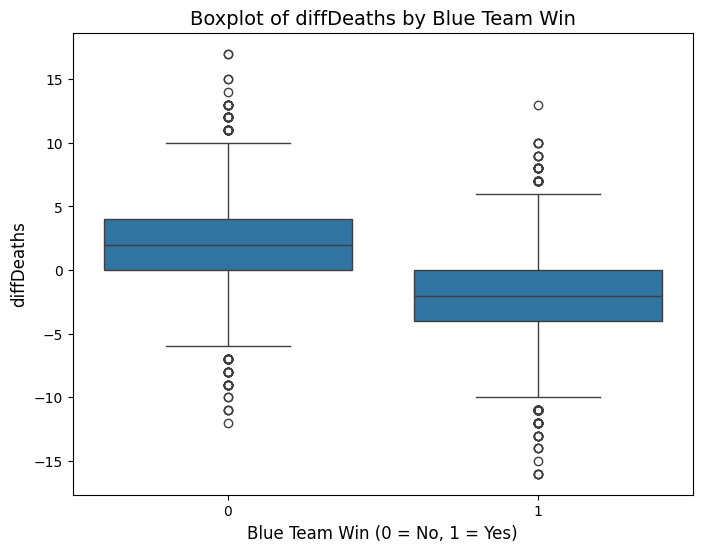

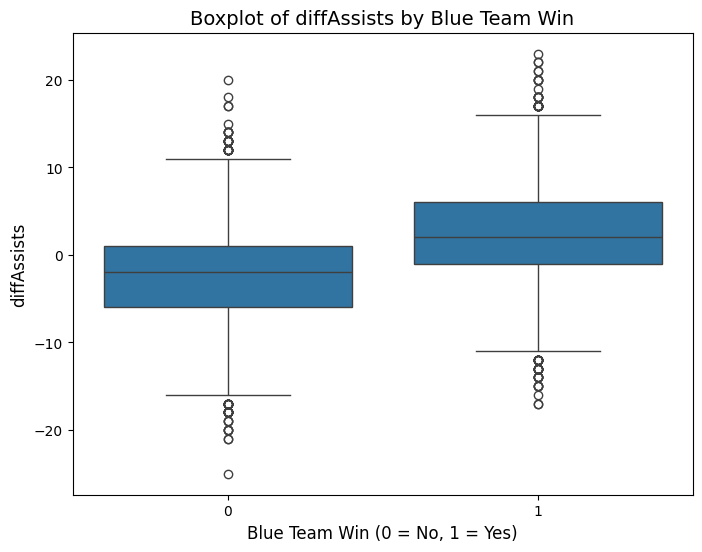

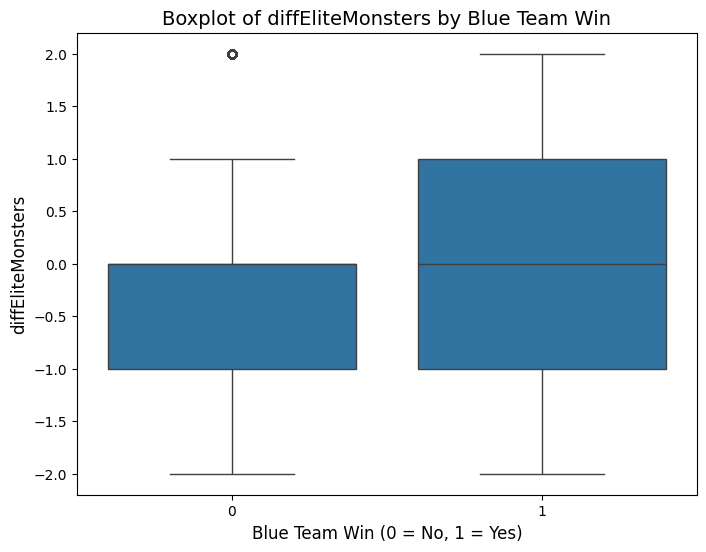

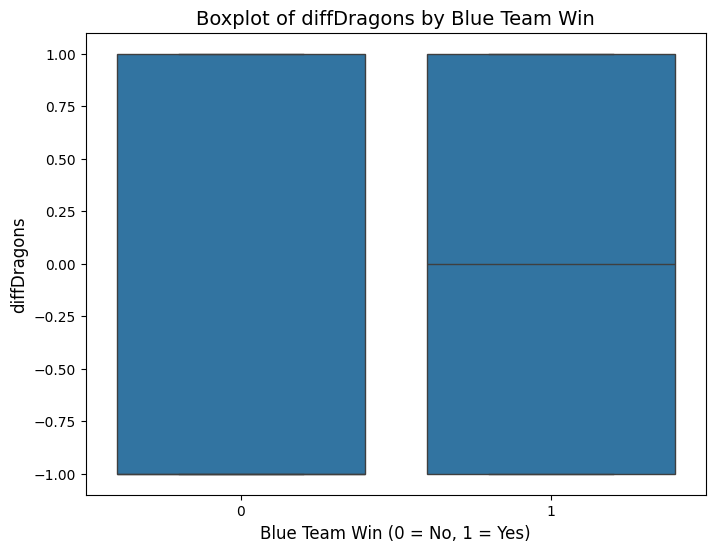

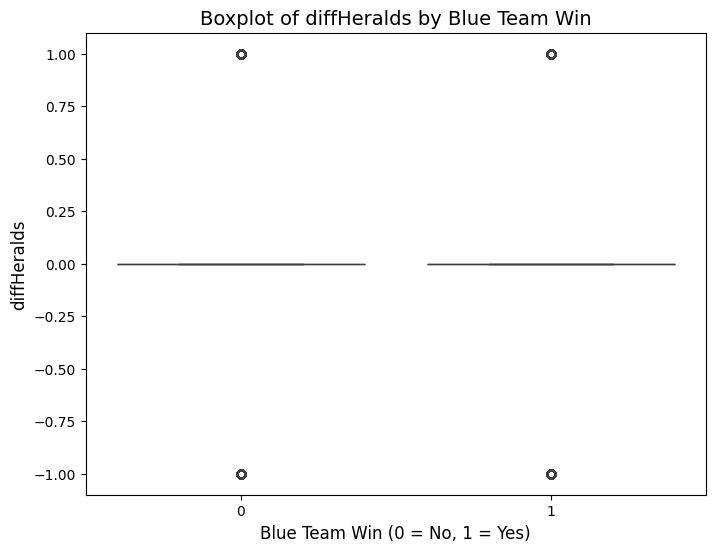

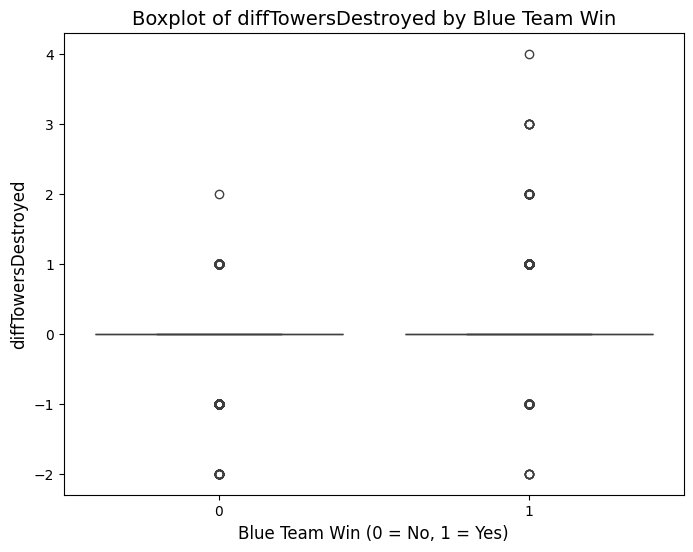

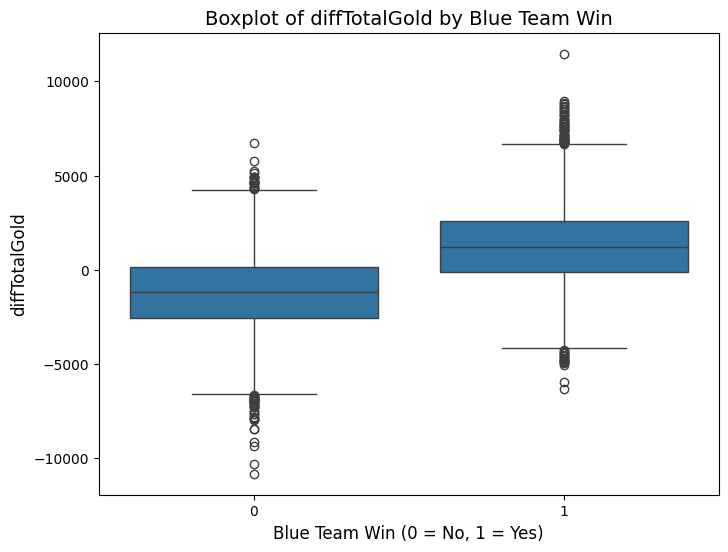

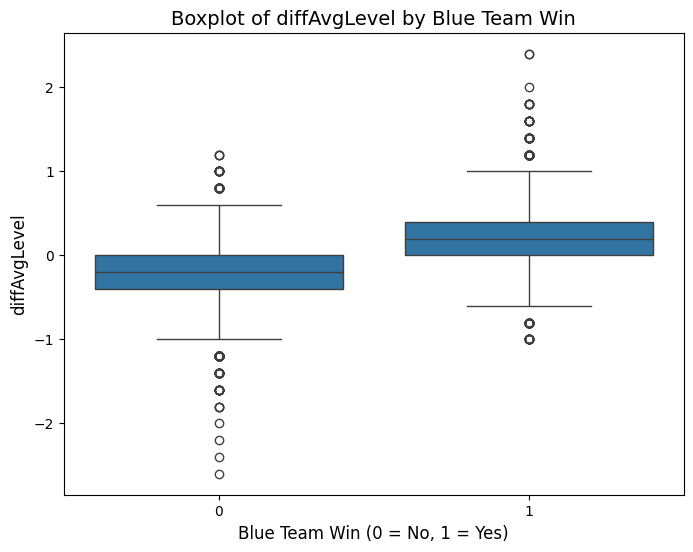

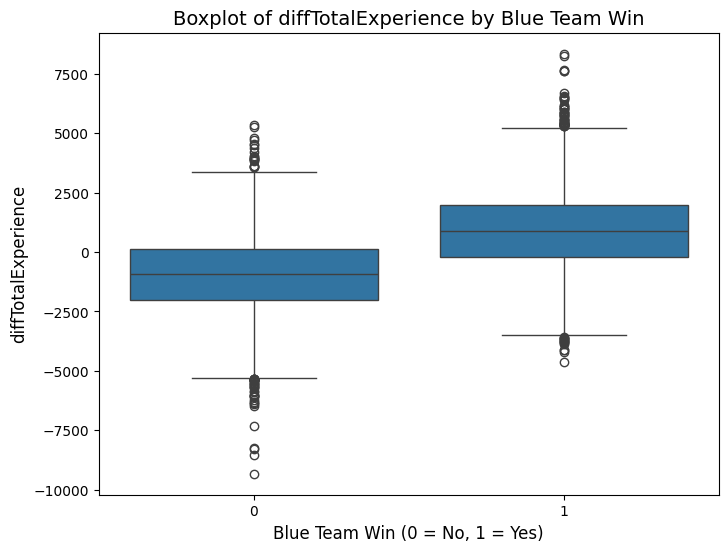

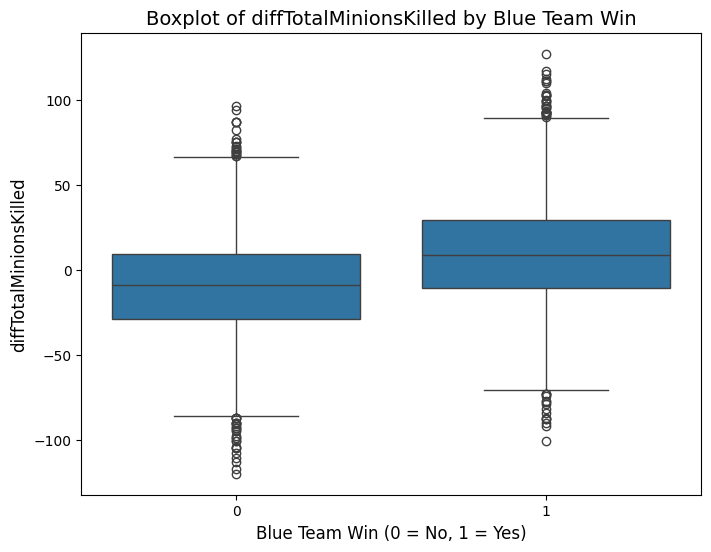

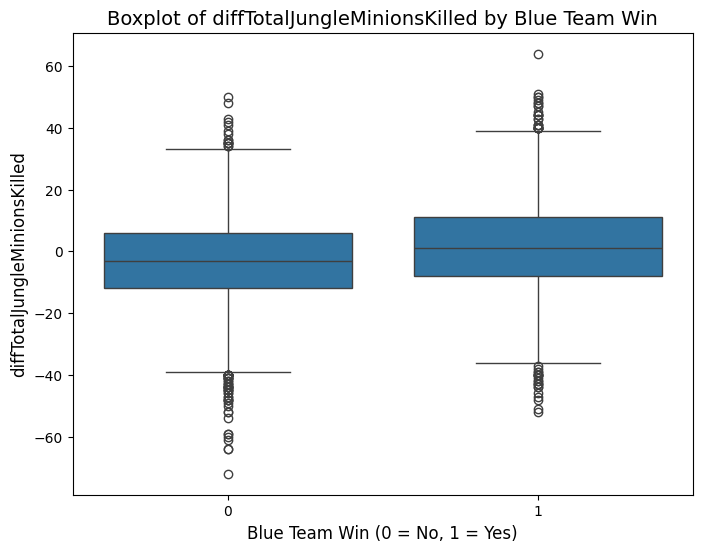

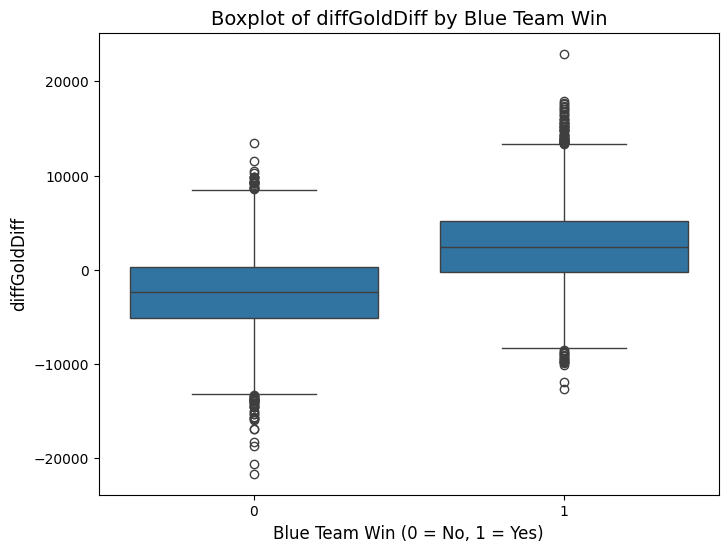

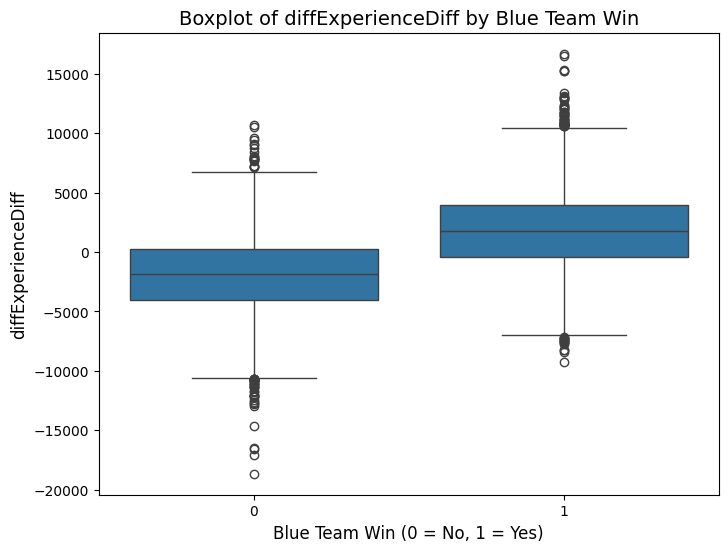

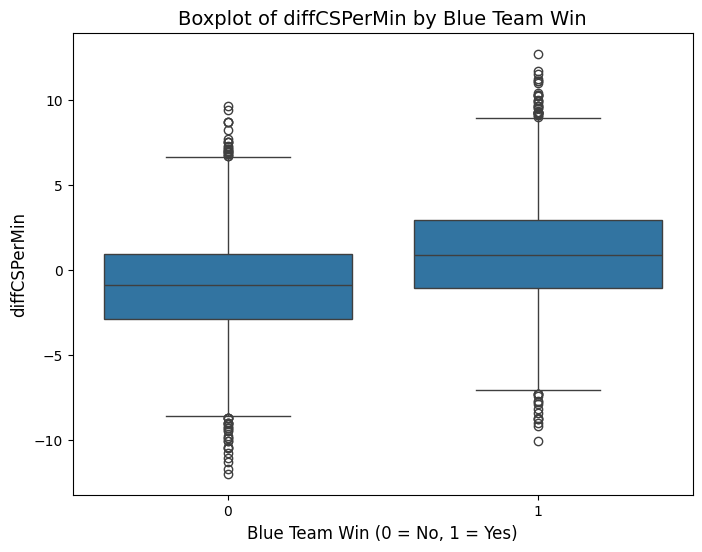

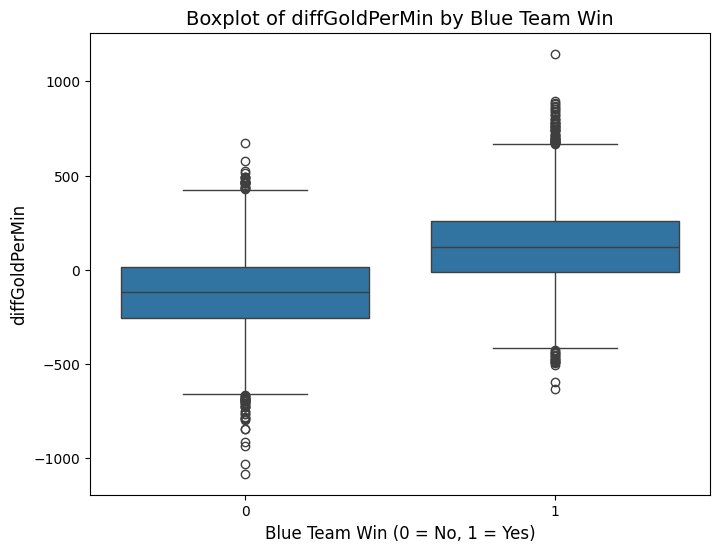

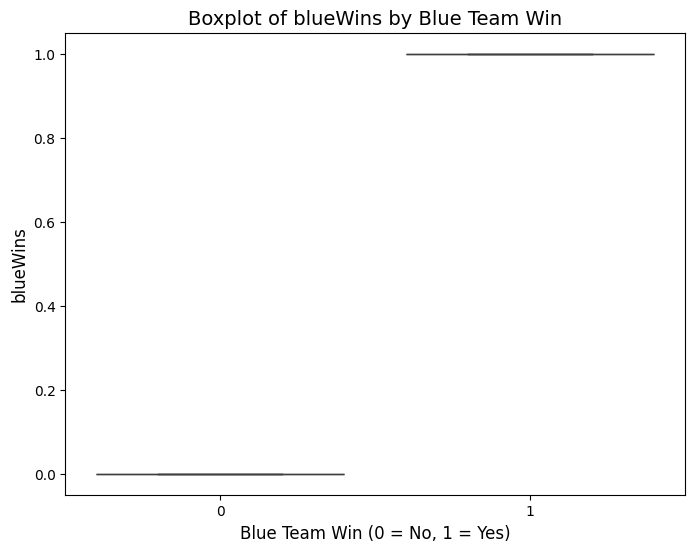

In [9]:
features = df_final
target = df_final['blueWins']

feature_columns = features.columns.tolist()

def create_boxplots(df, target_col, feature_cols):
    for feature in feature_cols:

        plt.figure(figsize=(8, 6))


        sns.boxplot(x=df[target_col], y=df[feature])

        plt.title(f'Boxplot of {feature} by Blue Team Win', fontsize=14)
        plt.xlabel('Blue Team Win (0 = No, 1 = Yes)', fontsize=12)
        plt.ylabel(feature, fontsize=12)

        filename = f'boxplot_{feature}.png'
        plt.show() 

create_boxplots(df_final, 'blueWins', feature_columns)



In [10]:
df_final.shape

(9879, 20)

In [11]:
X = df_final.drop(columns=["blueWins"])
y = df_final["blueWins"]


 logistic regression model suffers from multicollinearity, as indicated by the nan values in the statsmodels output. This makes it difficult to interpret the individual impact of features.

In [12]:
X_diff = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_diff.columns
vif_data["VIF"] = [variance_inflation_factor(X_diff.values, i) for i in range(len(X_diff.columns))]

print(vif_data)

                         feature       VIF
0                          const  1.014444
1                diffWardsPlaced  1.023743
2             diffWardsDestroyed  1.035574
3                 diffFirstBlood  1.266912
4                      diffKills       inf
5                     diffDeaths       inf
6                    diffAssists  3.995523
7              diffEliteMonsters       inf
8                    diffDragons       inf
9                    diffHeralds       inf
10           diffTowersDestroyed  1.588497
11                 diffTotalGold       inf
12                  diffAvgLevel  6.513266
13           diffTotalExperience       inf
14        diffTotalMinionsKilled       inf
15  diffTotalJungleMinionsKilled  1.798408
16                  diffGoldDiff       inf
17            diffExperienceDiff       inf
18                  diffCSPerMin       inf
19                diffGoldPerMin       inf


/Users/hoang/miniconda3/envs/dtsc/lib/python3.13/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [13]:
# Compute absolute correlation matrix
corr_matrix = X.corr().abs()

high_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = high_corr[high_corr > 0.9].dropna(how='all').dropna(axis=1, how='all')

print(high_corr)


                        diffDeaths  diffTotalGold  diffTotalExperience  \
diffKills                      1.0       0.917008                  NaN   
diffDeaths                     NaN       0.917008                  NaN   
diffTotalGold                  NaN            NaN                  NaN   
diffAvgLevel                   NaN            NaN             0.919161   
diffTotalExperience            NaN            NaN                  NaN   
diffTotalMinionsKilled         NaN            NaN                  NaN   
diffGoldDiff                   NaN            NaN                  NaN   

                        diffGoldDiff  diffExperienceDiff  diffCSPerMin  \
diffKills                   0.917008                 NaN           NaN   
diffDeaths                  0.917008                 NaN           NaN   
diffTotalGold               1.000000                 NaN           NaN   
diffAvgLevel                     NaN            0.919161           NaN   
diffTotalExperience              NaN 

In [14]:
X_final= df_final[['diffExperienceDiff','diffKills', 'diffAssists', 'diffWardsPlaced', 'diffWardsDestroyed','diffFirstBlood', 'diffEliteMonsters', 'diffTotalMinionsKilled','diffTotalJungleMinionsKilled', 'diffTowersDestroyed','diffTotalGold']]
y_final=df_final['blueWins']

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, stratify=y, random_state=42)


scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

model = LogisticRegression(max_iter=300, n_jobs=None)
model.fit(X_train_sc, y_train)
X_train_sc= pd.DataFrame(X_train_sc, columns=X_train.columns, index=X_train.index)

X_train_sc_const = sm.add_constant(X_train_sc)
# Fit logistic regression model using statsmodels
model_sm = sm.Logit(y_train, X_train_sc_const).fit()
# Print the summary table, which includes p-values
print(model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.528507
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               blueWins   No. Observations:                 7903
Model:                          Logit   Df Residuals:                     7891
Method:                           MLE   Df Model:                           11
Date:                Wed, 03 Sep 2025   Pseudo R-squ.:                  0.2375
Time:                        18:50:06   Log-Likelihood:                -4176.8
converged:                       True   LL-Null:                       -5477.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0031      0.027     -0.114      0.909

In [15]:
coef = model_sm.params  
odds_ratios = np.exp(coef)  
percent_change = (odds_ratios - 1) * 100  

# Combine into a DataFrame
odds_df = pd.DataFrame({
    'Feature': coef.index,
    'Coefficient': coef.values,
    'Odds Ratio': odds_ratios,
    '% Change in Odds': percent_change
})

print(odds_df)

                                                   Feature  Coefficient  \
const                                                const    -0.003058   
diffExperienceDiff                      diffExperienceDiff     0.449821   
diffKills                                        diffKills    -0.114363   
diffAssists                                    diffAssists    -0.065269   
diffWardsPlaced                            diffWardsPlaced    -0.009927   
diffWardsDestroyed                      diffWardsDestroyed     0.011756   
diffFirstBlood                              diffFirstBlood     0.035453   
diffEliteMonsters                        diffEliteMonsters     0.252903   
diffTotalMinionsKilled              diffTotalMinionsKilled    -0.144115   
diffTotalJungleMinionsKilled  diffTotalJungleMinionsKilled    -0.022067   
diffTowersDestroyed                    diffTowersDestroyed    -0.116851   
diffTotalGold                                diffTotalGold     1.258473   

                        

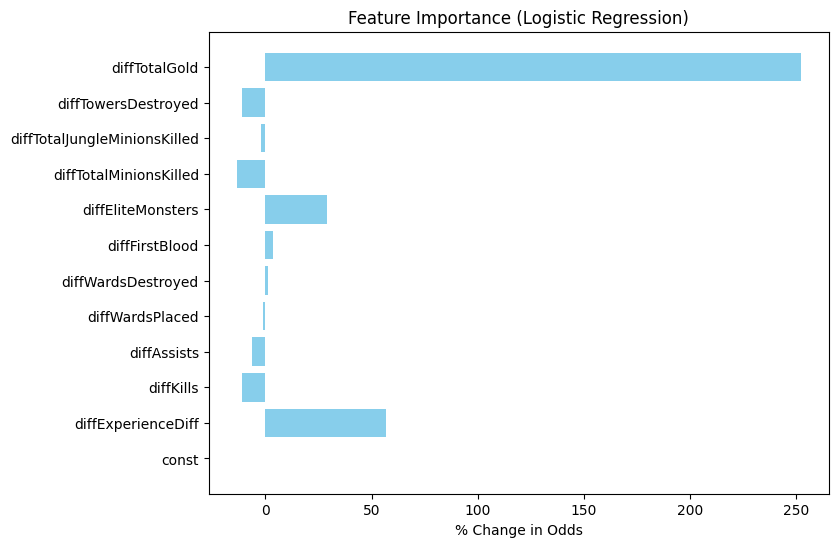

In [16]:

plt.figure(figsize=(8,6))
plt.barh(odds_df['Feature'], odds_df['% Change in Odds'], color='skyblue')
plt.xlabel('% Change in Odds')
plt.title('Feature Importance (Logistic Regression)')
plt.show()


Top Random Forest Importances:


diffTotalGold                   0.232967
diffExperienceDiff              0.168673
diffTotalMinionsKilled          0.109909
diffKills                       0.092120
diffTotalJungleMinionsKilled    0.091528
diffAssists                     0.091189
diffWardsPlaced                 0.088568
diffWardsDestroyed              0.060262
diffEliteMonsters               0.041338
diffFirstBlood                  0.016146
diffTowersDestroyed             0.007301
dtype: float64

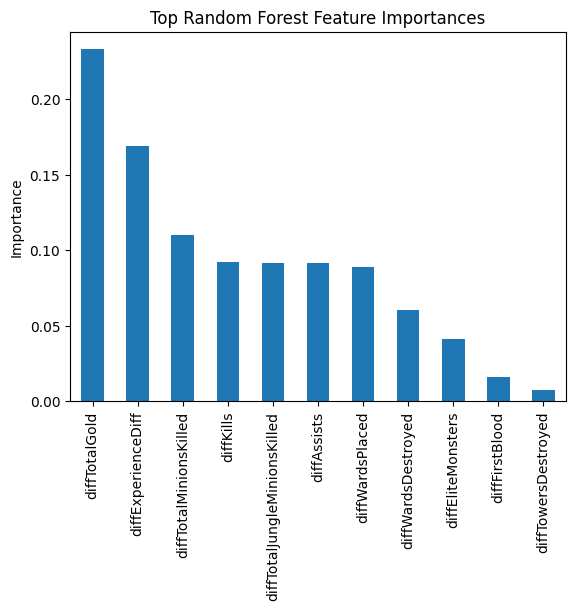

In [17]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_final, y_final)

rf_importances = pd.Series(rf.feature_importances_, index=X_final.columns).sort_values(ascending=False)
print("Top Random Forest Importances:")
display(rf_importances.head(15))

plt.figure()
rf_importances.plot(kind="bar")
plt.title("Top Random Forest Feature Importances")
plt.ylabel("Importance")
plt.xticks(rotation=90)
plt.show()

In [18]:
# Initialize classifiers
classifiers = {
   "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
}

In [19]:

# Function to calculate feature importance for each classifier
def calculate_feature_importance(classifiers, X_train, y_train):
    importance_results = {}

    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        
        if name == "Decision Tree":
            importance_results[name] = clf.feature_importances_
        elif name == "LDA":
            # For LDA, the absolute values of the coefficients are used to determine importance
            importance_results[name] = np.abs(clf.coef_[0])
    
    return importance_results

# Calculate feature importance
importance_values = calculate_feature_importance(classifiers, X_train_sc, y_train)


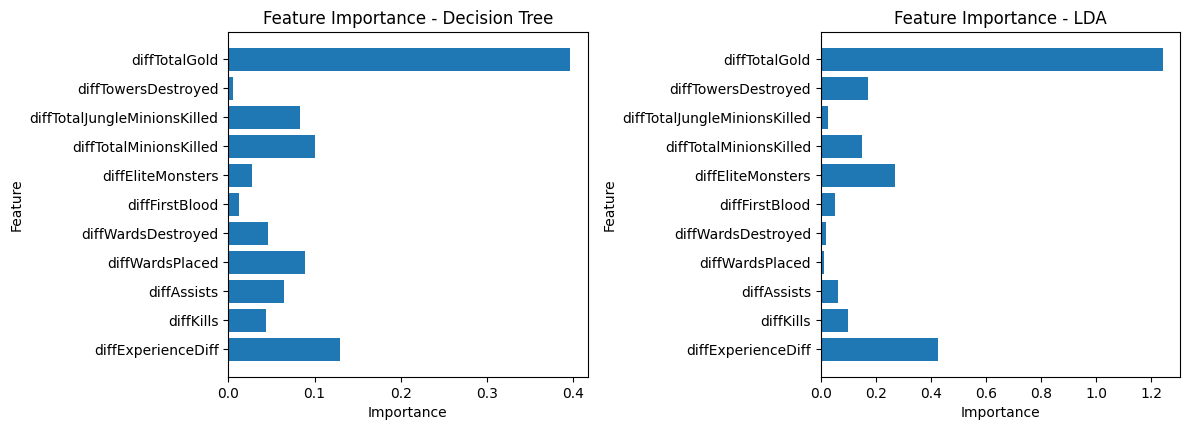

In [20]:


# Plot feature importance
def plot_feature_importance(importance_values, feature_names):
    plt.figure(figsize=(12, 8))
    
    for i, (name, importance) in enumerate(importance_values.items()):
        plt.subplot(2, 2, i+1)
        plt.barh(feature_names, importance)
        plt.title(f'Feature Importance - {name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')

    plt.tight_layout()
    plt.show()


feature_names = X_final.columns


# Plotting the feature importances
plot_feature_importance(importance_values, feature_names)



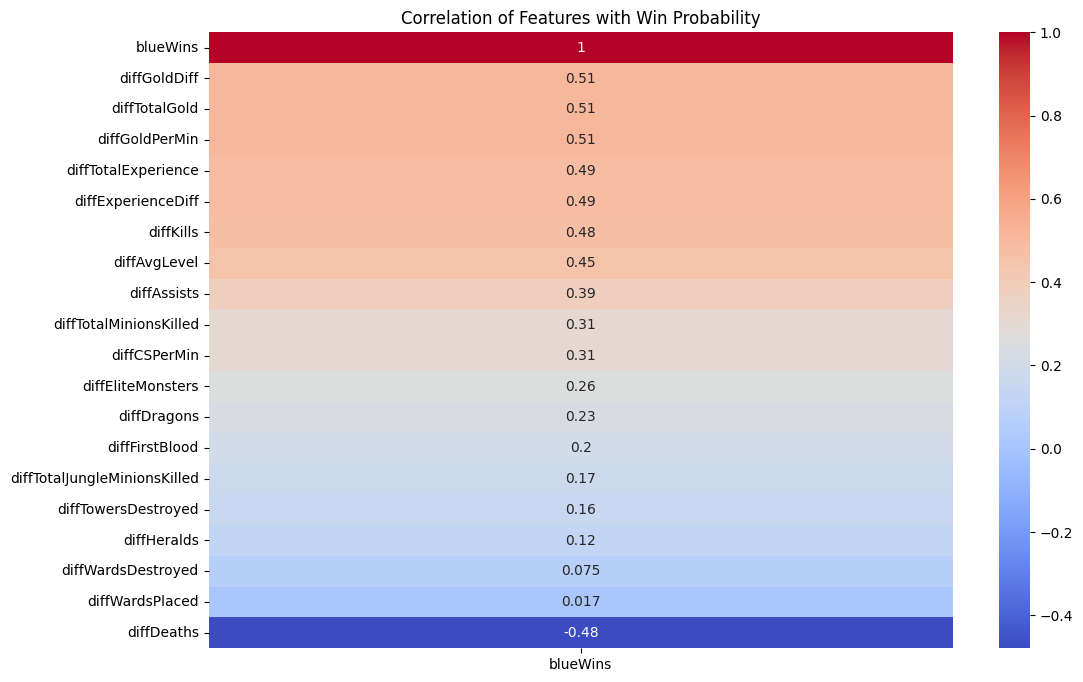

In [22]:
corr = X.join(y).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[['blueWins']].sort_values(by='blueWins', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Win Probability')
plt.show()


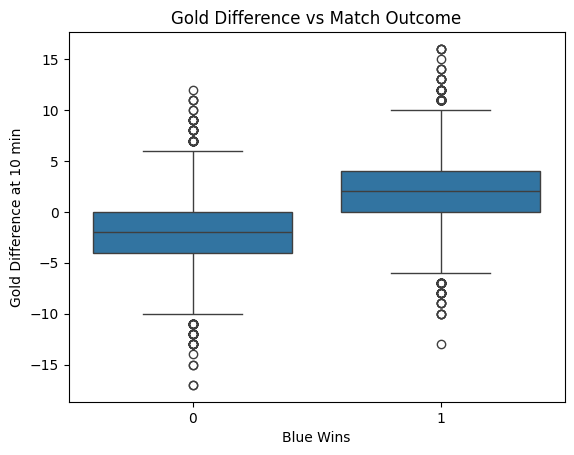

In [ ]:
sns.boxplot(x=y, y=X_diff['diffKills'])
plt.xlabel('Blue Wins')
plt.ylabel('Kills Difference at 10 min')
plt.title('Kills Difference vs Match Outcome')
plt.show()



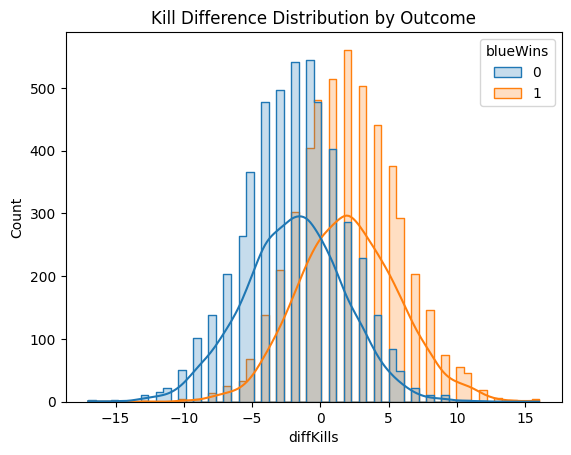

In [28]:
sns.histplot(data=X_diff.join(y), x='diffKills', hue='blueWins', kde=True, element='step')
plt.title('Kill Difference Distribution by Outcome')
plt.show()


/Users/hoang/miniconda3/envs/dtsc/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


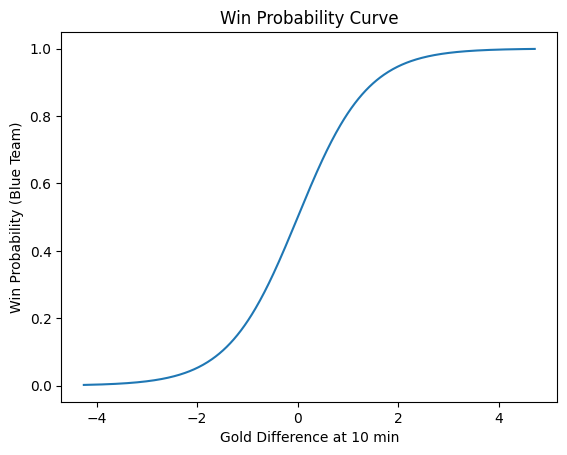

In [32]:
from sklearn.linear_model import LogisticRegression
import numpy as np

log_reg = LogisticRegression()
log_reg.fit(X_train_sc[['diffTotalGold']], y_train)

x_vals = np.linspace(X_train_sc['diffTotalGold'].min(), X_train_sc['diffTotalGold'].max(), 500).reshape(-1,1)
probs = log_reg.predict_proba(x_vals)[:,1]

plt.plot(x_vals, probs)
plt.xlabel('Gold Difference at 10 min')
plt.ylabel('Win Probability (Blue Team)')
plt.title('Win Probability Curve')
plt.show()
